# Planteamiento del proyecto

Se ha desarrollado un nuevo sistema de detección temprana de patologías cardiovasculares. Sin embargo, hacer la prueba y el diagnóstico es un proceso costoso y lento. Por lo tanto, tu compañía te pide desarrollar un algoritmo para eliminar casos que no requieren de una detección tan fina.

El dataset a utilizar es el que aparece en la carpeta: [Cardiovascular Disease Dataset](./Cardiovascular_Disease_Dataset.csv)

In [1]:
# Importación de algunas librerías
import pandas as pd 

rn_state = 42

Variables del dataset:
- ***patientid:*** Numero identificativo del paciente(único).
- ***age:*** Edad.
- ***gender:*** Género, 0 (female), 1 (male).
- ***chestpain:*** Tipo de dolor en el pecho,  0 (angina típica), 1 (angina atípica), 2 (dolor no anginoso), 3 (asintomático).
- ***restingBP:*** Presión arterial en reposo, 94-200 (in mm HG).
- ***serumcholestrol:*** Colesterol sérico, 126-564 (in mg/dl).
- ***fastingbloodsugar:*** Glucemia en ayunas, 0 (false), 1 (true) > 120 mg/dl.
- ***restingelectro:***  Resultados del electrocardiograma en reposo, 0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy).
- ***maxheartrate:*** Frecuencia cardíaca máxima alcanzada, 71-202.
- ***exerciseangia:*** Angina inducida por el ejercicio, 0 (no), 1 (yes).
- ***oldpeak:*** Viejo pico = ST, 0-6.2.
- ***slope:*** Pendiente del segmento ST del ejercicio máximo, 1 (pendiente ascendente), 2 (plana), 3 (pendiente descendente).
- ***noofmajorvessels:*** Número de vasos mayores (0, 1, 2, 3).
- ***tarjet*** Clasificación resultado 0 (Ausencia de enfermedad cardíaca), 1 (Presencia de enfermedad cardíaca).

## 1. Primer contacto con los datos

En este apartado cargaremos los datos y realizaremos una exploración de los mismos.

### 1.1. Carga de los datos

Cargaremos los datos en un dataframe de pandas.


In [8]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df_cardiovascular.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


### 1.2. Limpieza de los datos

En este apartado realizaremos una limpieza de los datos.
- Obtenemos información del dataset.
- Sacamos los parámetros estadísticos más relevantes de las variables
- Identificamos y eliminamos los valores nulos y duplicados.
- Realizamos una transformación de variables para que sean más fáciles de analizar, si es necesario.
- Eliminamos las variables que no aportan ninguna información relevante.


In [9]:
# Mostramos información de los datos
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [10]:
# Hacemos un resumen de las métricas estadísticas más relevantes de los datos
df_cardiovascular.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [11]:
# Vemos la cantidad de valores NaN que hay
df_cardiovascular.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [12]:
# Vemos la cantidad de valores duplicados que hay
df_cardiovascular.duplicated().sum()

0

No tenemos ni valores perdidos(NaN) ni duplicados. Sólo tenemos que eliminar la variable **patientid**, que no aporta ninguna información relevante, antes de hacer un análisis más exaustivo.

In [13]:
df_cardiovascular_clean = df_cardiovascular.drop(columns='patientid')
df_cardiovascular_clean.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


### 1.3. EDA 

En esta etapa vamos a realizar un análisis más exaustivo de las variables.
- Veremos la distribución de las variables numéricas.
- Veremos la relación entre las variables numéricas y categóricas.
- Veremos la relación entre las variables categóricas.

### 1.3.1. Distribución de las variables numéricas

En este apartado vamos a ver la distribución de las variables numéricas.



<Axes: >

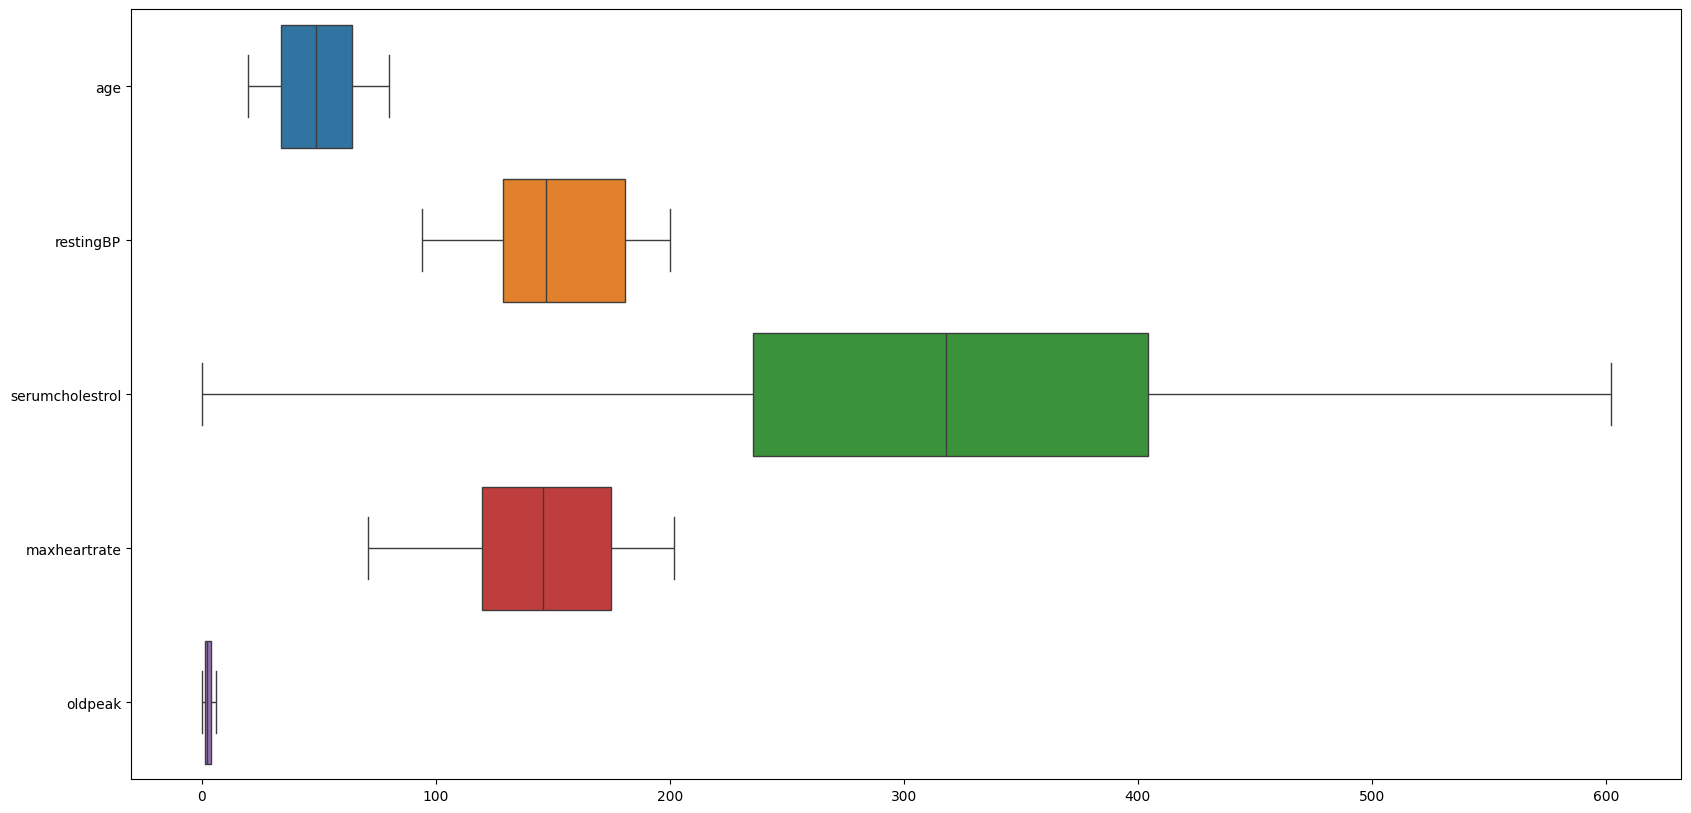

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir un umbral para el número máximo de valores únicos que puede tener una columna categórica
threshold = 10

# Identificar columnas numéricas basadas en el umbral de valores únicos
numerical_columns = [col for col in df_cardiovascular_clean.columns if df_cardiovascular_clean[col].nunique() > threshold]

df_cardiovascular_numerical = df_cardiovascular_clean[numerical_columns]

plt.figure(figsize = (20, 10))
sns.boxplot(data = df_cardiovascular_numerical, orient = "h")

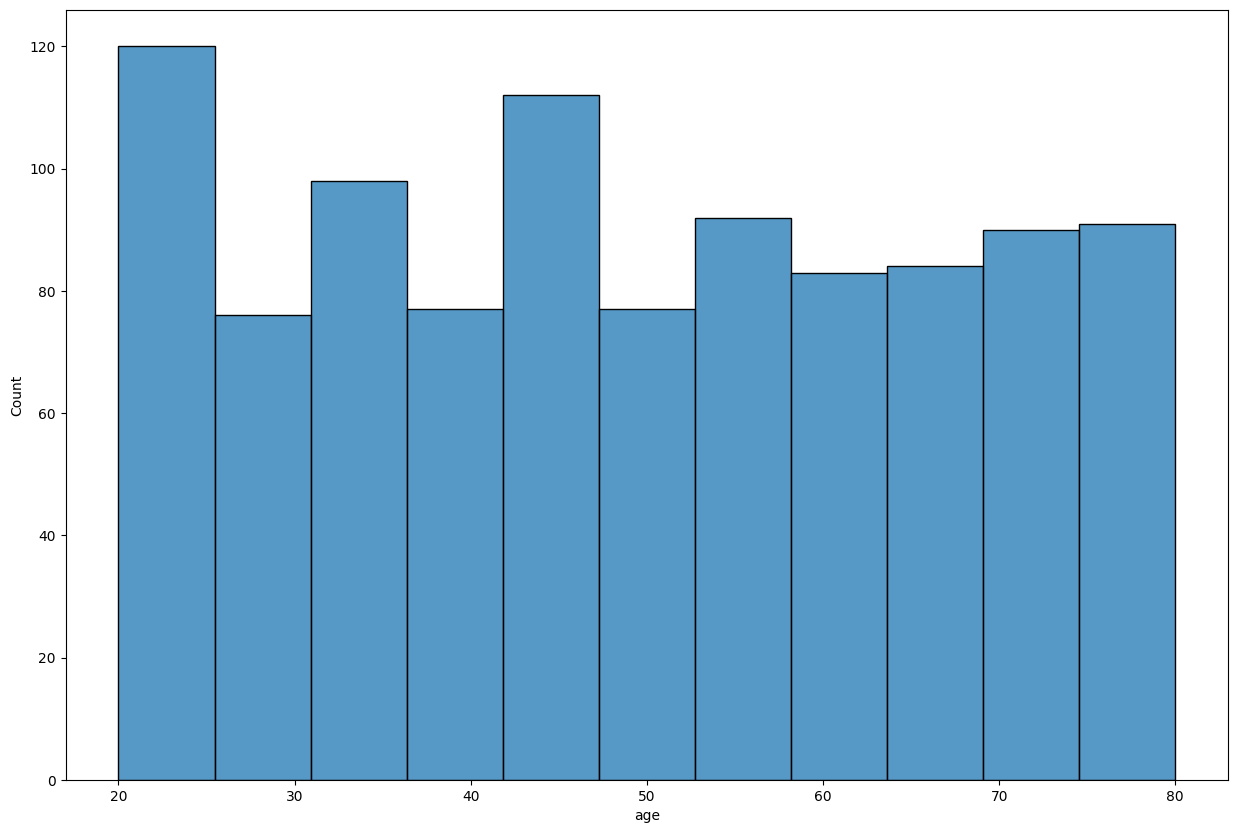

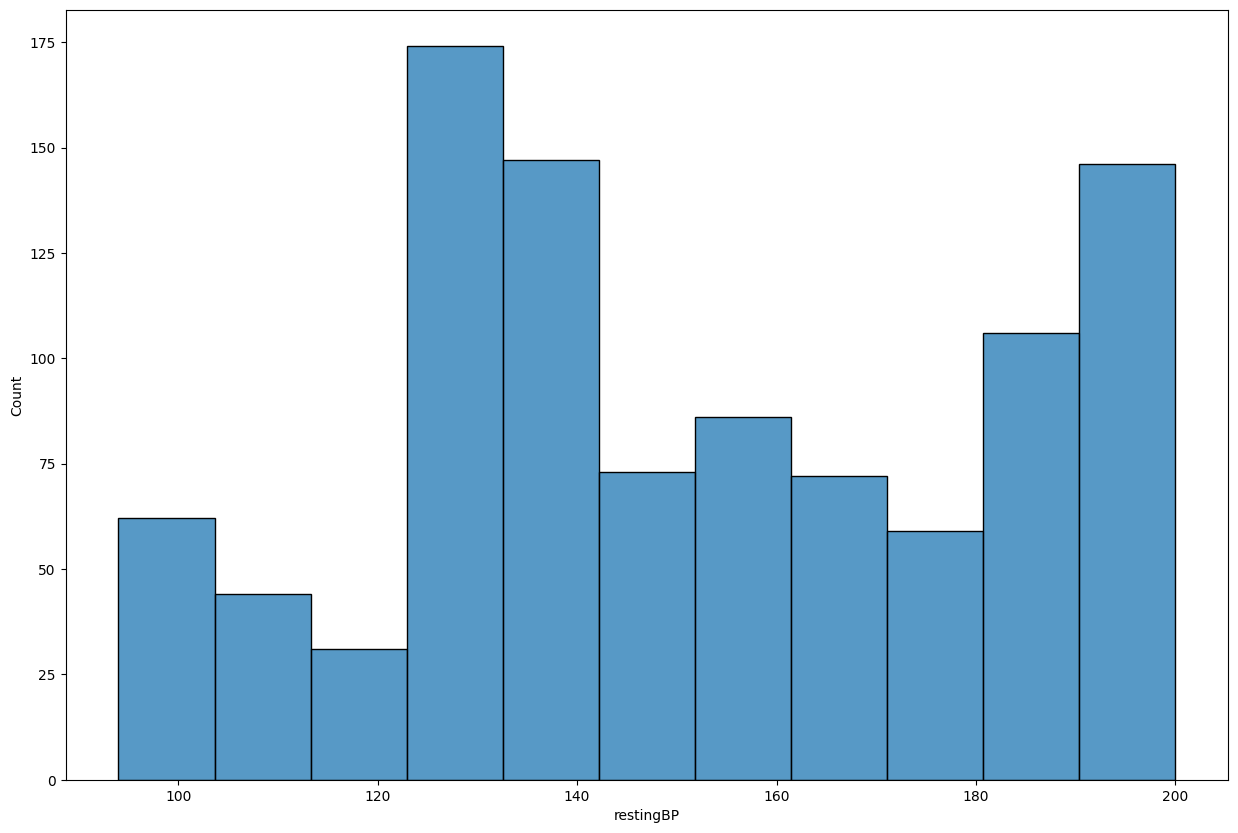

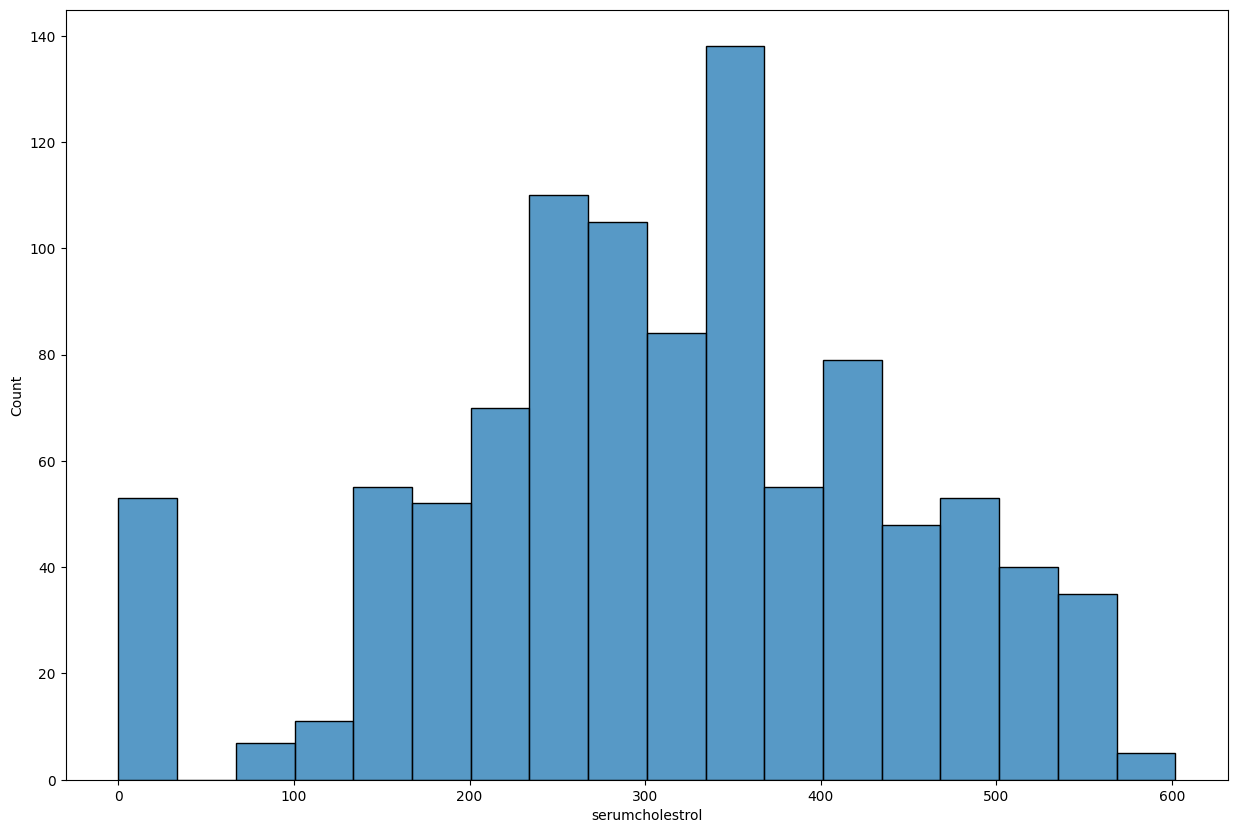

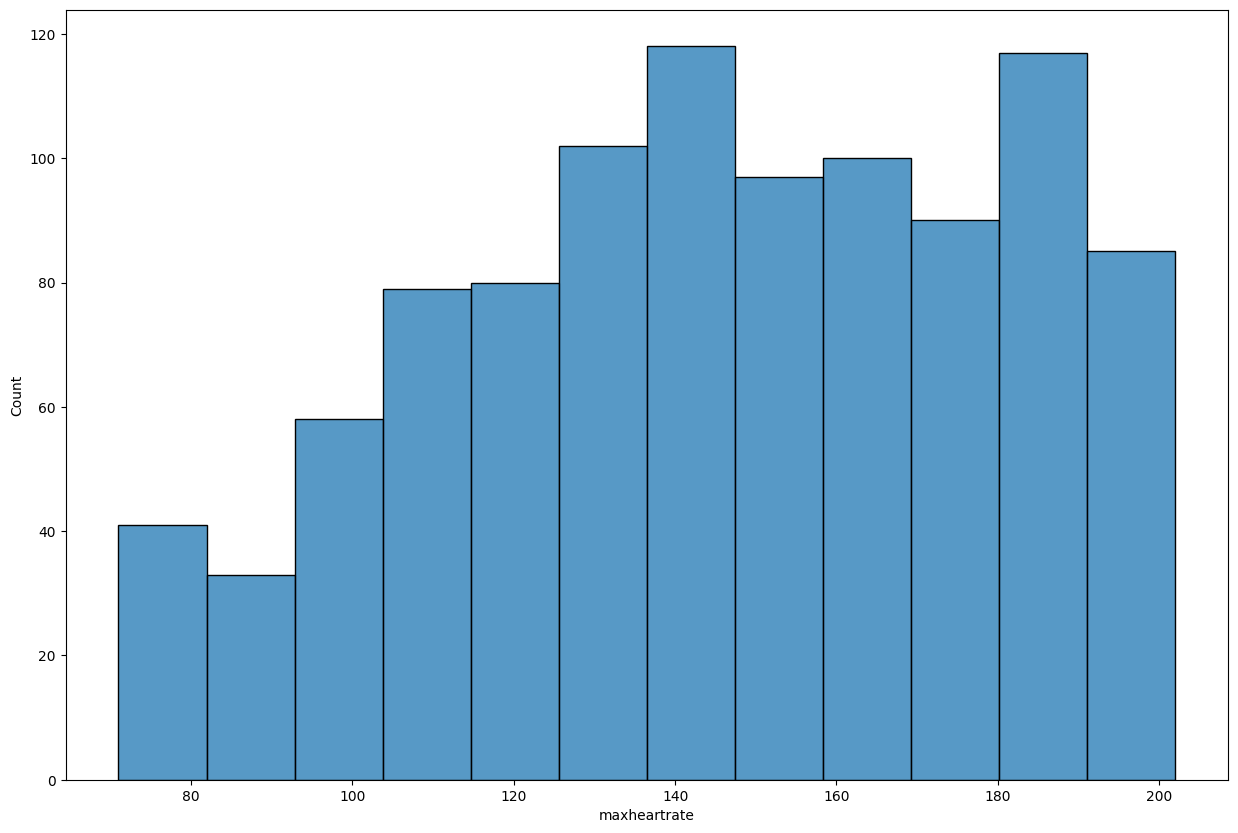

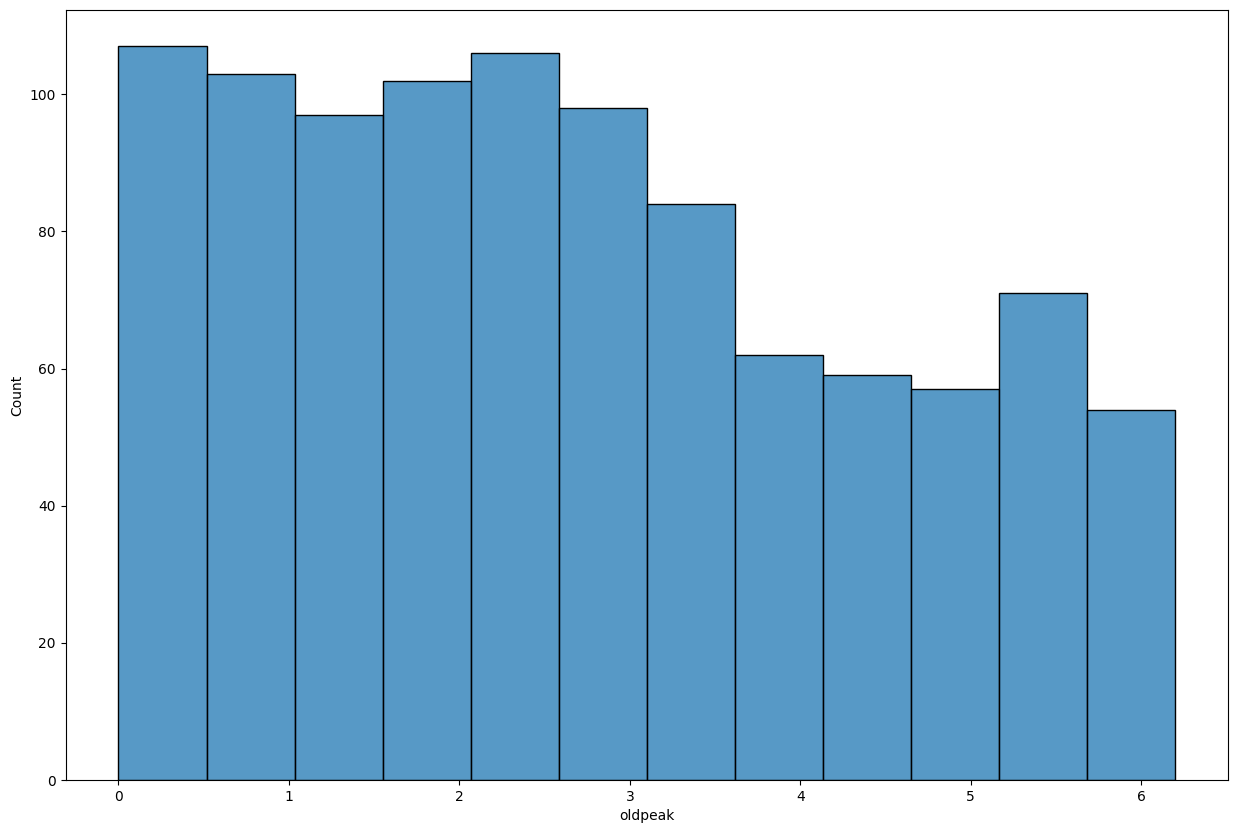

In [22]:
# Veamos los histogramas de las  variables numéricas
for col in numerical_columns:
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_cardiovascular_numerical[col])

### 1.3.2. Relación entre las variables numéricas y categóricas

En este apartado vamos a ver la relación entre las variables numéricas y categóricas.

In [18]:
# Identificar columnas numéricas basadas en el umbral de valores únicos
categorical_columns = [col for col in df_cardiovascular_clean.columns if df_cardiovascular_clean[col].nunique() <= threshold]

df_cardiovascular_categorical = df_cardiovascular_clean[categorical_columns]

plt.